# Finding the Best Markets to Advertise In

---

## 1. Introduction

In this project, we assume that we are working for an e-learning company that offers courses on programming in English. Most of the courses are on web and mobile development, but we also cover many other domains e.g. data science, game development. 

The objective is to **find out the two best countries for the company to advertise its products in**, by leveraging on existing data from [freeCodeCamp's 2017 New Coder Survey](https://github.com/freeCodeCamp/2017-new-coder-survey). [freeCodeCamp](https://www.freecodecamp.org/) is a popular free e-learning platform that offers courses on web development. Hence, their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

The target population of our analysis are new coders who are interested in the subjects offered by our company. From the data, we would like to ascertain:
- the locations of new coders and 
- the amount of money which new coders are willing to spend on learning.

---

## 2. Open and Explore the Data

We will start by open and reading the data.

In [1]:
import pandas as pd
fcc = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory = False)
fcc.shape

(18175, 136)

The dataset has 18175 rows and 136 columns, let's inspect the first few rows.

In [2]:
fcc.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


After inspecting the data, we have identified the following columns which may be useful for further analysis.

| Column | Description |
| - | - |
| `JobRoleInterest` | Job role(s) which respondent indicated interest in |
| `CountryLive` | Country which respondent lives in |
| `MonthsProgramming` | Number of months which respondent has spent programming |
| `MoneyForLearning` | Amount of money spent by respondent to learn programming |
| `AttendedBootcamp`| Whether the respondent attended a bootcamp |

Here is a sample of the data in these columns.

In [3]:
fcc.loc[:, ['JobRoleInterest', 'CountryLive', 'MonthsProgramming', 'MoneyForLearning', 'AttendedBootcamp']].head()

,JobRoleInterest,CountryLive,MonthsProgramming,MoneyForLearning,AttendedBootcamp
0,NaN,Canada,6.0,150.0,0.0
1,Full-Stack Web Developer,United States of America,6.0,80.0,0.0
2,"Front-End Web Developer, Back-End Web Develo...",United States of America,5.0,1000.0,0.0
3,"Front-End Web Developer, Full-Stack Web Deve...",Brazil,5.0,0.0,0.0
4,"Full-Stack Web Developer, Information Security...",Portugal,24.0,0.0,0.0


We should also confirm whether the sample is representative for our population of interest and has the right categories of people for our purpose. 

Let's understand the frequency distribution for the values in the `JobRoleInterest column`.

In [4]:
print('JobRoleInterest:                                       Relative Frequency (%)')
print((fcc['JobRoleInterest'].value_counts(normalize = True) * 100).head(10))

JobRoleInterest:                                       Relative Frequency (%)
Full-Stack Web Developer                               11.770595
  Front-End Web Developer                               6.435927
  Data Scientist                                        2.173913
Back-End Web Developer                                  2.030892
  Mobile Developer                                      1.673341
Game Developer                                          1.630435
Information Security                                    1.315789
Full-Stack Web Developer,   Front-End Web Developer     0.915332
  Front-End Web Developer, Full-Stack Web Developer     0.800915
  Product Manager                                       0.786613
Name: JobRoleInterest, dtype: float64


- The interest in web development (e.g. full-stack, front-end and/or back-end) is the higher than other job roles.
- There is some interest in mobile development and other domains (e.g. data scientist, game development).
- There are respondents who are interested in multiple subjects.

We will further process the data to understand whether the respondents are more interested in a single subject or multiple topics.

In [5]:
# Drop the null values and split string
job_interests = fcc['JobRoleInterest'].dropna()
job_interests_split = job_interests.str.split(',')

# Generate frequency table for number of job roles in response
no_of_options = job_interests_split.apply(lambda x: len(x))
print('Number of Roles: % of Respondents')
print(no_of_options.value_counts(normalize = True).sort_index() * 100)

Number of Roles: % of Respondents
1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64


It seems that the vast majority of respondents have mixed interests, whereas only about one-third of them have a clear idea of the area they intend to work in. This may be beneficial to the company since we offer courses on various subjects.

Although we want to advertise our courses to people interested in all sorts of programming niches, the company's focus is still on web and mobile development. Let's find out how many respondents chose at least one of these two options.

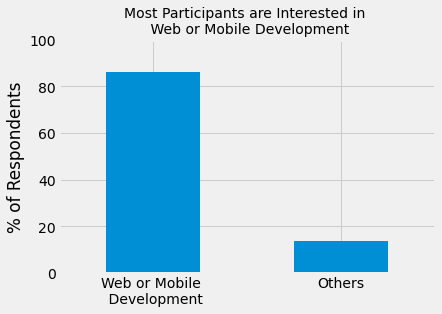

In [6]:
# Boolean series of whether job roles include web or mobile development
web_or_mobile = job_interests.str.contains('Web Developer|Mobile Developer')

# Frequency table of whether job roles include web or mobile development
freq_table = web_or_mobile.value_counts(normalize = True) * 100

# Plot % of respondents interested in web or mobile development
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

freq_table.plot.bar()
plt.title('Most Participants are Interested in \n Web or Mobile Development', fontsize = 14)

plt.xticks(ticks = [0, 1], labels = ['Web or Mobile \n Development', 'Others'], rotation = 0)
plt.ylabel('% of Respondents')
plt.ylim(0, 100)

plt.show()

Since most of the survey respondents are interested in either web or mobile development, we can consider this sample to be representative for our population of interest. Lastly, we will drop all the rows where respondents did not answer which roles they are interested in.

In [7]:
fcc_rep = fcc[fcc['JobRoleInterest'].notnull()].copy()
fcc_rep.shape

(6992, 136)

---

## 3. Analyze the Data

**a. Locations of new coders**

In order to determine the two best countries for the company to advertise in, we will use the data to compute the number of potential customers in each country.

In [8]:
# Calculate number and % of respondents living in each country
absolute_freq = fcc_rep['CountryLive'].value_counts(ascending = False)
relative_freq = fcc_rep['CountryLive'].value_counts(ascending = False, normalize = True) * 100

pd.DataFrame(data = {'Absolute frequency': absolute_freq, 'Percentage': relative_freq}).head()

,Absolute frequency,Percentage
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765


**USA seems like the largest market with 45.7% of potential customers living there**. 

India has the second highest number of potential customers, with UK and Canada close behind.

**b. Amount of money which new coders are willing to spend on learning**

Our company sells subscriptions at a price of $59 per month, so we would like to understand whether potential customers are willing to spend on our courses instead of learning for free.

Below, we will calculate the average amount of money spent by a respondent per month to learn programming.

In [9]:
# Replace zero values to avoid computational error (assume 1 instead)
fcc_rep['MonthsProgramming'].replace(0, 1, inplace = True)
fcc_rep['SpentPerMonth'] = fcc_rep['MoneyForLearning'] / fcc_rep['MonthsProgramming']

# Check number of null values
print(f"There are {fcc_rep['SpentPerMonth'].isnull().sum()} null values in the SpentPerMonth column.")
print(f"There are {fcc_rep['CountryLive'].isnull().sum()} null values in the CountryLive column.")

There are 675 null values in the SpentPerMonth column.
There are 154 null values in the CountryLive column.


Since only about 10% of the rows contain null values in the `SpentPerMonth` or `CountryLive` columns, we will disregard them for the analysis below.

In [10]:
# Retain rows without null values in the 2 columns
fcc_rep_not_null = fcc_rep[fcc_rep['SpentPerMonth'].notnull() & fcc_rep['CountryLive'].notnull()]
fcc_rep_not_null.shape

(6212, 137)

We will further narrow down our analysis to USA, India, UK and Canada as these countries have the highest number of potential customers and add up to about 62% of the total sample size. Moreover, the courses are offered in English, which is an official language in these countries. This will improve the chances of potential customers taking up our courses.

We will then compute the average amount of money spent per month to learn programming for each country.

In [11]:
# Aggregate by country and compute mean amount spent per month
countries_mean = fcc_rep_not_null.groupby(['CountryLive']).agg('mean')['SpentPerMonth']

# Narrow down to 4 countries selected
selected_countries = ['United States of America', 'India', 'United Kingdom', 'Canada']
countries_mean[selected_countries]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: SpentPerMonth, dtype: float64

- USA has the highest average spend per month, almost twice that of India and Canada.
- UK has a very low average spend per month compared to the other countries.

The disparity between values of each country is surprisingly quite large. Let's visualise the average spend per month values for each country on separate box plots, to further understand the distribution and ascertain if there are any outliers.

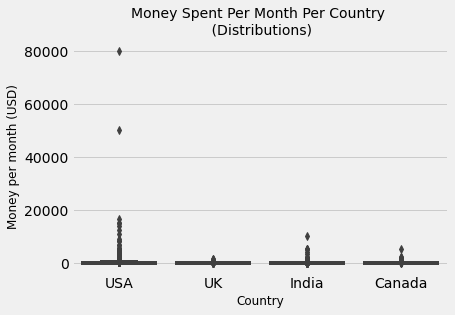

In [12]:
fcc_top4 = fcc_rep_not_null[fcc_rep_not_null['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]

# Generate boxplots of distribution for each country
import seaborn as sns
import numpy as np

sns.boxplot(x = 'CountryLive', y = 'SpentPerMonth', data = fcc_top4)
plt.title('Money Spent Per Month Per Country \n (Distributions)', fontsize = 14)

plt.xticks(np.arange(4), ['USA', 'UK', 'India', 'Canada'])
plt.xlabel('Country', fontsize = 12)
plt.ylabel('Money per month (USD)', fontsize = 12)

plt.show()

There are extreme outliers for the USA data, with two people spending more than $50,000 per month on programming.

We will remove values above $20,000 per month as it is unlikely that these data points are accurate.

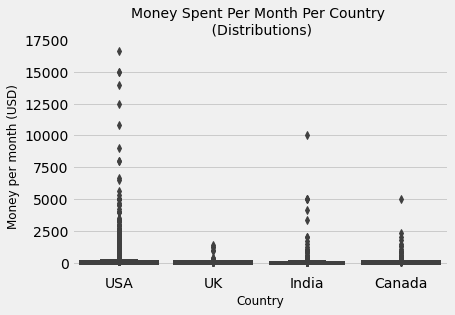

In [13]:
# Drop outliers above 20,000
fcc_top4 = fcc_top4[fcc_top4['SpentPerMonth'] < 20000]

# Generate boxplots of distribution for each country
sns.boxplot(x = 'CountryLive', y = 'SpentPerMonth', data = fcc_top4)
plt.title('Money Spent Per Month Per Country \n (Distributions)', fontsize = 14)

plt.xticks(np.arange(4), ['USA', 'UK', 'India', 'Canada'])
plt.xlabel('Country', fontsize = 12)
plt.ylabel('Money per month (USD)', fontsize = 12)

plt.show()

Now, we notice a few clear outliers for India (values over $2,500 per month), but it is unclear whether these data points are accurate.

Let's investigate them in further detail.

In [14]:
india_outliers = fcc_top4[(fcc_top4['CountryLive'] == 'India') & (fcc_top4['SpentPerMonth'] >= 2500)]
india_outliers.loc[:, ['CountryLive', 'SpentPerMonth', 'MoneyForLearning', 'MonthsProgramming', 'AttendedBootcamp']]

,CountryLive,SpentPerMonth,MoneyForLearning,MonthsProgramming,AttendedBootcamp
1728,India,5000.000000,20000.0,4.0,0.0
1755,India,3333.333333,50000.0,15.0,0.0
7989,India,5000.000000,5000.0,1.0,0.0
8126,India,5000.000000,5000.0,1.0,0.0
13398,India,10000.000000,20000.0,2.0,0.0
15587,India,4166.666667,100000.0,24.0,0.0


Since none of these respondents attended a bootcamp, it seems unlikely that they spent above $2,500 per month on average for their learning. Hence, we will regard these rows as erroneous data and disregard them.

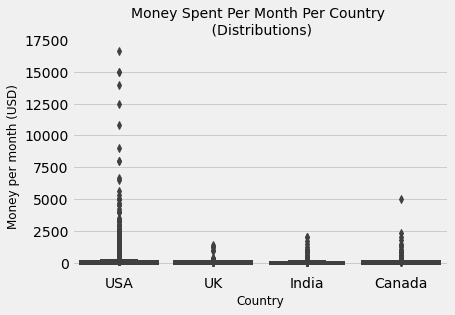

In [15]:
# Drop outliers for India above 2,500
fcc_top4.drop(index = india_outliers.index, inplace = True)

# Generate boxplots of distribution for each country
sns.boxplot(x = 'CountryLive', y = 'SpentPerMonth', data = fcc_top4)
plt.title('Money Spent Per Month Per Country \n (Distributions)', fontsize = 14)

plt.xticks(np.arange(4), ['USA', 'UK', 'India', 'Canada'])
plt.xlabel('Country', fontsize = 12)
plt.ylabel('Money per month (USD)', fontsize = 12)

plt.show()

From the box plot, there are also some additional outliers for the USA (values over $6,000 per month). 

We will examine these respondents in more detail.

In [16]:
usa_outliers = fcc_top4[(fcc_top4['CountryLive'] == 'United States of America') & (fcc_top4['SpentPerMonth'] >= 6000)]
usa_outliers.loc[:, ['CountryLive', 'SpentPerMonth', 'MoneyForLearning', 'MonthsProgramming', 'AttendedBootcamp']]

,CountryLive,SpentPerMonth,MoneyForLearning,MonthsProgramming,AttendedBootcamp
718,United States of America,8000.000000,8000.0,1.0,1.0
1222,United States of America,6500.000000,13000.0,2.0,1.0
3184,United States of America,9000.000000,9000.0,1.0,1.0
3930,United States of America,10833.333333,65000.0,6.0,0.0
6805,United States of America,15000.000000,15000.0,1.0,1.0
7198,United States of America,14000.000000,70000.0,5.0,0.0
7505,United States of America,6666.666667,20000.0,3.0,1.0
9778,United States of America,8000.000000,8000.0,1.0,1.0
16650,United States of America,16666.666667,200000.0,12.0,0.0
16997,United States of America,12500.000000,12500.0,1.0,0.0


5 of the 11 respondents did not attend bootcamps, hence it is difficult to figure out how they spent that much money on learning.

The remaining 6 respondents attended bootcamps but have been programming for no more than 3 months. It is likely that they paid a large sum of money for a bootcamp that lasts a few months, and will not spend much more for the next few months. This implies that their current spend per month values may be unrealistic and will decrease over time.

Hence, we will remove all these 11 outliers.

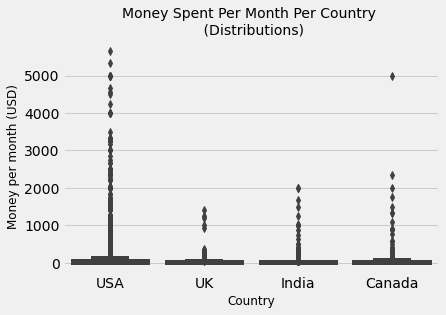

In [17]:
# Remove USA outliers who did not attend bootcamp
no_bootcamp = fcc_top4[(fcc_top4['CountryLive'] == 'United States of America') & (fcc_top4['SpentPerMonth'] >= 6000) & (fcc_top4['AttendedBootcamp'] == 0.0)]
fcc_top4.drop(index = no_bootcamp.index, inplace = True)

# Remove USA outliers that had been programming for less than 3 months
less_than_3_months = fcc_top4[(fcc_top4['CountryLive'] == 'United States of America') & (fcc_top4['SpentPerMonth'] >= 6000) & (fcc_top4['MonthsProgramming'] <= 3)]
fcc_top4.drop(index = less_than_3_months.index, inplace = True)

# Generate boxplots of distribution for each country
sns.boxplot(x = 'CountryLive', y = 'SpentPerMonth', data = fcc_top4)
plt.title('Money Spent Per Month Per Country \n (Distributions)', fontsize = 14)

plt.xticks(np.arange(4), ['USA', 'UK', 'India', 'Canada'])
plt.xlabel('Country', fontsize = 12)
plt.ylabel('Money per month (USD)', fontsize = 12)

plt.show()

Lastly, there is a single extreme outlier for Canada who spends apprximately $5,000 per month. 

We will sieve out this data point to analyze in depth.

In [18]:
canada_outlier = fcc_top4[(fcc_top4['CountryLive'] == 'Canada') & (fcc_top4['SpentPerMonth'] >= 3000)]
canada_outlier.loc[:, ['CountryLive', 'SpentPerMonth', 'MoneyForLearning', 'MonthsProgramming', 'AttendedBootcamp']]

,CountryLive,SpentPerMonth,MoneyForLearning,MonthsProgramming,AttendedBootcamp
13659,Canada,5000.0,10000.0,2.0,1.0


Similarly, we will remove this row as the respondent has been programming for only 2 months and probably attended an expensive bootcamp.

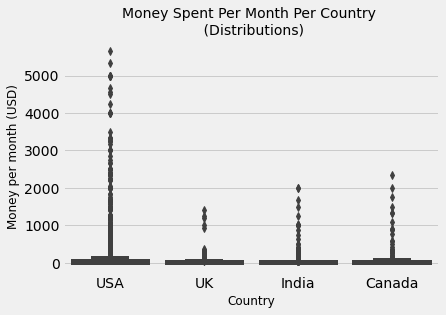

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: SpentPerMonth, dtype: float64


In [19]:
# Remove outlier for Canada.
fcc_top4.drop(index = canada_outlier.index, inplace = True)

# Generate boxplots of distribution for each country
sns.boxplot(x = 'CountryLive', y = 'SpentPerMonth', data = fcc_top4)
plt.title('Money Spent Per Month Per Country \n (Distributions)', fontsize = 14)

plt.xticks(np.arange(4), ['USA', 'UK', 'India', 'Canada'])
plt.xlabel('Country', fontsize = 12)
plt.ylabel('Money per month (USD)', fontsize = 12)

plt.show()

# Recompute the mean values, grouped by CountryLive column.
print(fcc_top4.groupby('CountryLive').agg('mean')['SpentPerMonth'])

Now that we have removed the outliers, we can ascertain that:
- USA has the highest average spend per month to learn programming.
- The **average spends per month for USA, Canada and India are more than the monthly subscription cost** for our courses.
- UK has the lowest average spend per month.

---

## 5. Conclusion

We **recommend to advertise in USA** because:
- it is the largest market with 45.7% of potential customers living there and
- they are willing to spend the most amount of money per month ($93) to learn programming.

We also **suggest to advertise in India** instead of Canada since:
- it is the second largest market with 7.7% of potential customers living there and
- their average spend per month is still sufficient to afford the monthly subscription cost ($59) for our courses.